<a href="https://colab.research.google.com/github/Kaiking28/ECON3916-Statistical-Machine-Learning/blob/main/Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Fetching data from FRED...
            Nominal_Wage    CPI
1964-01-01          2.50  30.94
1964-02-01          2.50  30.91
1964-03-01          2.51  30.94
1964-04-01          2.52  30.95
1964-05-01          2.52  30.98
            Nominal_Wage      CPI
2025-07-01         31.35  322.132
2025-08-01         31.45  323.364
2025-09-01         31.52  324.368
2025-11-01         31.73  325.031
2025-12-01         31.76  326.030
            Nominal_Wage      CPI  Real_Wage
2025-07-01         31.35  322.132  31.729355
2025-08-01         31.45  323.364  31.709292
2025-09-01         31.52  324.368  31.681502
2025-11-01         31.73  325.031  31.827524
2025-12-01         31.76  326.030  31.760000


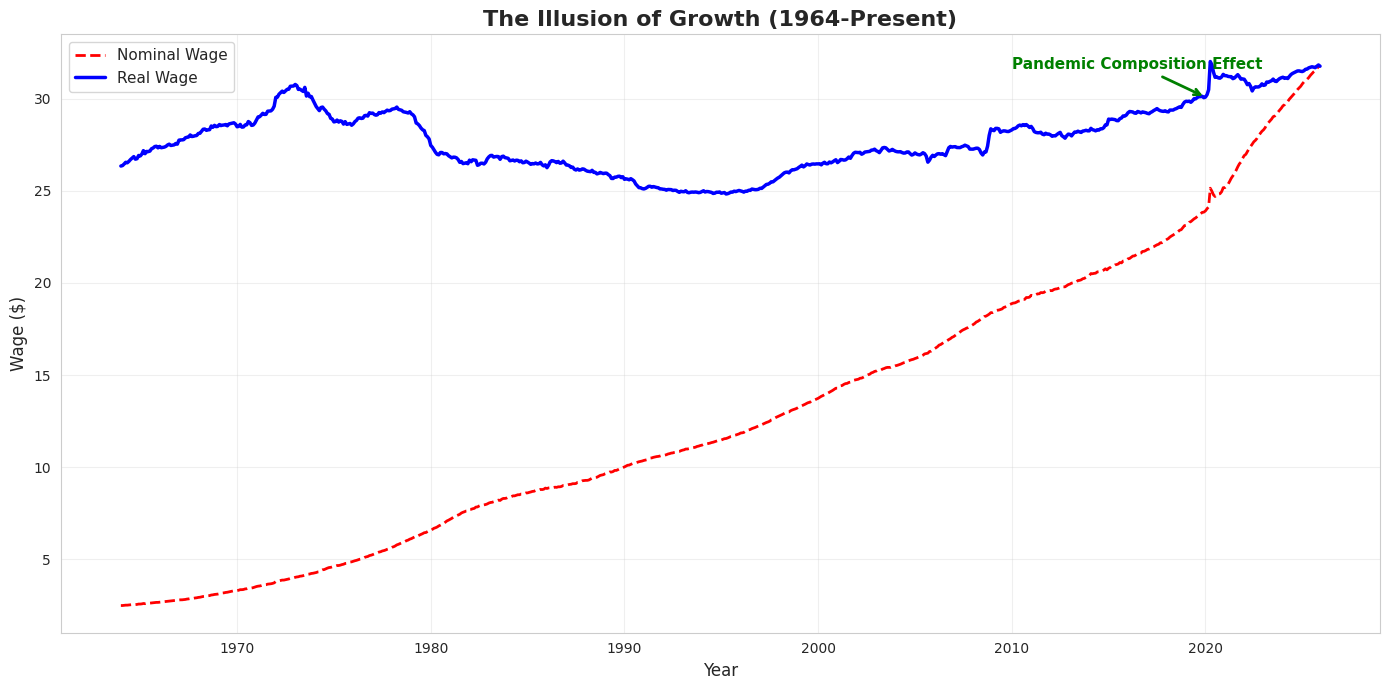

In [24]:

import pandas as pd
import matplotlib.pyplot as plt
from fredapi import Fred

fred = Fred(api_key='6a4da7a639a7c98bf5e2531d3ea1b4fe')


print("Fetching data from FRED...")
wages = fred.get_series('AHETPI')
cpi = fred.get_series('CPIAUCSL')

df = pd.DataFrame({'Nominal_Wage': wages, 'CPI': cpi})

df = df.dropna()

print(df.head())
print(df.tail())


def get_real_wage(nominal_col, cpi_col):
    """
    Takes a nominal column and a CPI column.
    Returns a new column adjusted for inflation (Real Dollars).
    """
    cpi_today = cpi_col.iloc[-1]

    real_col = (nominal_col / cpi_col) * cpi_today

    return real_col

df['Real_Wage'] = get_real_wage(df['Nominal_Wage'], df['CPI'])

print(df.tail())


import matplotlib.pyplot as plt
import seaborn as sns


# Create the figure and axis
fig, ax = plt.subplots(figsize=(14, 7))

# Plot both wage series
ax.plot(df.index, df['Nominal_Wage'],
        linestyle='--',
        color='red',
        linewidth=2,
        label='Nominal Wage')

ax.plot(df.index, df['Real_Wage'],
        linestyle='-',
        color='blue',
        linewidth=2.5,
        label='Real Wage')

# Add title and labels
ax.set_title('The Illusion of Growth (1964-Present)',
             fontsize=16,
             fontweight='bold')
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Wage ($)', fontsize=12)

# Add legend
ax.legend(loc='upper left', fontsize=11)

# Add annotation for 2020 pandemic spike
# Find the 2020 Real_Wage value
year_2020_data = df[df.index.year == 2020]
if not year_2020_data.empty:
    spike_date = year_2020_data.index[0]
    spike_value = year_2020_data['Real_Wage'].iloc[0]

    ax.annotate('Pandemic Composition Effect',
                xy=(spike_date, spike_value),
                xytext=(spike_date - pd.DateOffset(years=10),
                        spike_value * 1.05),
                arrowprops=dict(arrowstyle='->',
                               color='green',
                               lw=2),
                fontsize=11,
                fontweight='bold',
                color='green')

# Add grid
ax.grid(True, alpha=0.3)

# Tight layout
plt.tight_layout()

# Display
plt.show()

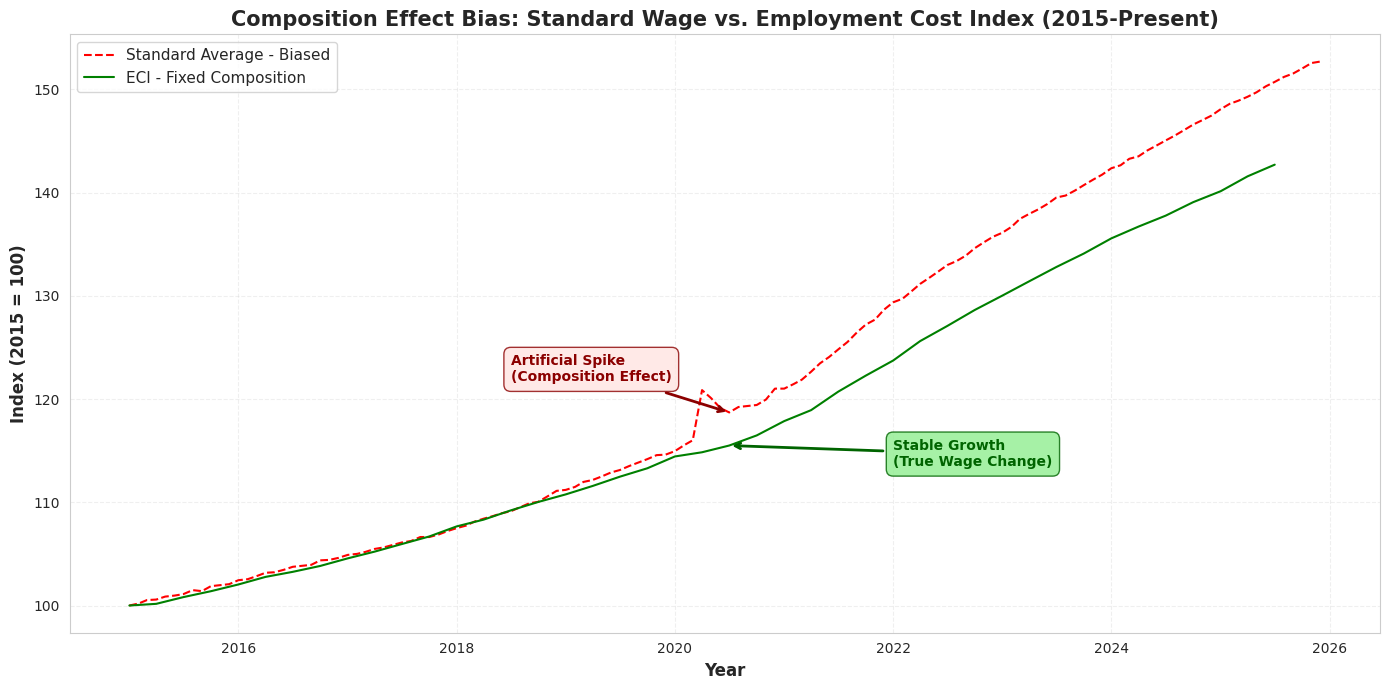

In [25]:
import matplotlib.pyplot as plt
import pandas as pd

# 1. Fetch the Employment Cost Index series
eci = fred.get_series('ECIWAG')

# 2. Filter both series to 2015-01-01 onwards
wages_filtered = wages[wages.index >= '2015-01-01']
eci_filtered = eci[eci.index >= '2015-01-01']

# 3. Rebase both series to 100 (first value = 100)
wages_rebased = (wages_filtered / wages_filtered.iloc[0]) * 100
eci_rebased = (eci_filtered / eci_filtered.iloc[0]) * 100

# 4. Create the plot
fig, ax = plt.subplots(figsize=(14, 7))

# Plot Standard Average (biased)
ax.plot(wages_rebased.index, wages_rebased,
        linestyle='--',
        color='red',
        label='Standard Average - Biased')

# Plot ECI (fixed composition)
ax.plot(eci_rebased.index, eci_rebased,
        color='green',
        label='ECI - Fixed Composition')

# Add title and labels
ax.set_title('Composition Effect Bias: Standard Wage vs. Employment Cost Index (2015-Present)',
             fontsize=15,
             fontweight='bold')
ax.set_xlabel('Year', fontsize=12, fontweight='bold')
ax.set_ylabel('Index (2015 = 100)', fontsize=12, fontweight='bold')

# Add legend
ax.legend(loc='upper left', fontsize=11, frameon=True)

# 5. Annotate the 2020 divergence
# Find 2020 data points
pandemic_year = 2020
wages_2020 = wages_rebased[wages_rebased.index.year == pandemic_year]
eci_2020 = eci_rebased[eci_rebased.index.year == pandemic_year]

if not wages_2020.empty and not eci_2020.empty:
    # Get the spike point (using median of 2020 data)
    spike_date = wages_2020.index[len(wages_2020)//2]
    spike_value_wages = wages_2020.iloc[len(wages_2020)//2]
    spike_value_eci = eci_2020.iloc[len(eci_2020)//2]

    # Annotate the artificial spike
    ax.annotate('Artificial Spike\n(Composition Effect)',
                xy=(spike_date, spike_value_wages),
                xytext=(spike_date - pd.DateOffset(years=2),
                        spike_value_wages + 3),
                arrowprops=dict(arrowstyle='->',
                               color='darkred',
                               lw=2),
                fontsize=10,
                fontweight='bold',
                color='darkred',
                bbox=dict(boxstyle='round,pad=0.5',
                         facecolor='mistyrose',
                         edgecolor='darkred',
                         alpha=0.8))

    # Annotate the stable growth
    ax.annotate('Stable Growth\n(True Wage Change)',
                xy=(spike_date, spike_value_eci),
                xytext=(spike_date + pd.DateOffset(years=1, months=6),
                        spike_value_eci - 2),
                arrowprops=dict(arrowstyle='->',
                               color='darkgreen',
                               lw=2),
                fontsize=10,
                fontweight='bold',
                color='darkgreen',
                bbox=dict(boxstyle='round,pad=0.5',
                         facecolor='lightgreen',
                         edgecolor='darkgreen',
                         alpha=0.8))

# Add grid
ax.grid(True, alpha=0.3, linestyle='--')

# Tight layout
plt.tight_layout()

# Display
plt.show()